In [1]:
%%html
<style>
    #notebook-container{
    width: 100%
    }
</style>

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.optimize import minimize

sns.set()

# Problem 3
## Task (c)

In this task I will generate matrix $A$ of size $20 \times 10$ and vector $b$ of size $20 \times 1$. Next I will find solution $\hat x = A^+ b$ using pseudoinverse $A^+$ of matrix $A$, found by using built-in python function. Afterwards, I will implement Richardson iteration scheme in respective method and try to find solution with tolerance 0,001 for the same system $Ax=b$. To show that Richardson method will converge, I will plot norm of distance between $x_k$, calcualted on each step, and $\hat x$ with respect to number of iterations. Expectation  is that such norm should go to 0 with increase of number of iterations.

In [33]:
def richardson_step(x_old, A, b): #defining single step of Richardson iteration scheme
    return x_old - np.dot(A.T,(np.dot(A,x_old)-b))/(np.linalg.norm(A)**2) #calculating new value of x

def richardson_iter(x_old, A, b, acc, x_hat): #defining method for iteration scheme for Richardson
    iter_count = 0
    errors=[]
    
    while True: #implementing do-while loop
        iter_count += 1
        x_new = richardson_step(x_old, A, b) #calculating new value for x using single step method Richardson method
        errors.append(np.linalg.norm(x_new - x_hat)) #calculating errors and saving to list
        if np.linalg.norm(np.dot(A.T,(np.dot(A,x_new)-b))) < acc: #check if exit condition is met - ||A^T(Ax-b)|| < acc
            return x_new, errors #return final result, list of errors and exit loop
            break
        
        x_old = x_new #reassign old value for next iteration
    

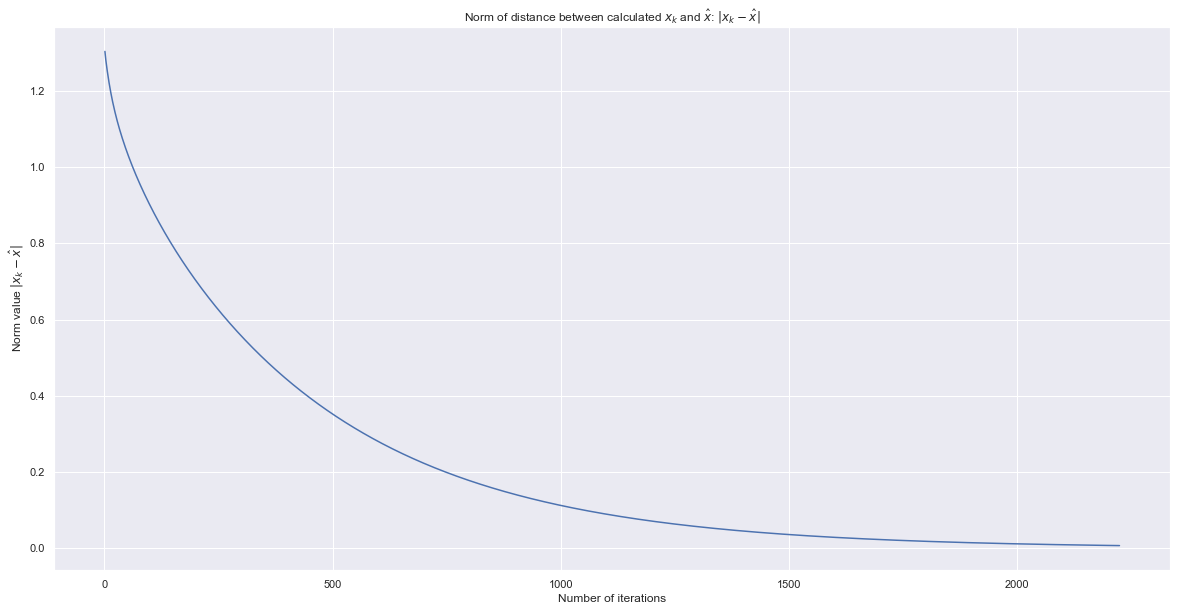

Solution found in 2224 iteratons
Solution found using pseudoinverse 
 [[ 0.23137 -0.38996  0.85896  0.45908  0.17428 -0.08715  0.59027 -0.13201
   0.12858 -0.54262]]
Solution found using Richardson iteration scheme with tolerance 0.001 
 [[ 0.22927 -0.38974  0.85575  0.45602  0.17581 -0.0851   0.58861 -0.13036
   0.12894 -0.5394 ]]


In [39]:
np.random.seed(7) #setting random seed
A = np.random.rand(20,10) #generating matrix A of size 20*10 randomly
b = np.random.rand(20,1) #generating veector b of size 20*1 randomly

x_hat = np.dot(np.linalg.pinv(A), b) #computing x_hat using pseudo-inverse of matrix A

acc = 0.001 #setting accuracy
x0 = np.zeros((10,1)) #setting x0 as zero vector

solution, errors = richardson_iter(x0, A, b, acc, x_hat) #find solution using Richardson iteration scheme

plt.figure(figsize=(20,10)) #ploting norm of distance on each step
sns.lineplot(x=np.arange(1, len(errors)+1, 1), y=np.array(errors))
plt.title('Norm of distance between calculated $x_k$ and $\hat x$: $\|x_k - \hat x \|$')
plt.ylabel("Norm value $\|x_k - \hat x \|$")
plt.xlabel("Number of iterations")
plt.show()

print("Solution found in %s iteratons" %len(errors)) #printing results
print("Solution found using pseudoinverse \n %s" %x_hat.T.round(5))
print("Solution found using Richardson iteration scheme with tolerance %s" %acc, "\n %s" %solution.T.round(5))
# print(np.linalg.norm(x_hat - solution))

As we could observe on the plot, difference between calculated $x_k$ and solution $\hat x$, found by using pseudoinverse matrix $A^+$, is going to 0 with increase of number of iterations: $\|x_k - \hat x\| \to 0$. Eventually, after 2200+ iterations, method converge to approximate solution with tolerance 0.001.

Corollary: Richardson iteration method converge to approximate solution of system $Ax=b$ with given tolerance.

# Problem 6
## Task (b)

In [282]:
def Jacobi_row(t, x, theta):
    drdc1 = 2*(theta[0].item() + theta[2].item()*math.cos(theta[4].item() + t) + theta[3].item()*math.cos(theta[4].item()-t) - x[0])
    drdc2 = 2*(theta[1].item() + theta[2].item()*math.sin(theta[4].item() + t) + theta[3].item()*math.sin(theta[4].item()-t) - x[1])
    drdr = 2*(theta[0].item() + theta[2].item()*math.cos(theta[4].item() + t) + theta[3].item()*math.cos(theta[4].item()-t) - x[0])*math.cos(theta[4].item() + t) + 2*(theta[1].item() + theta[2].item()*math.sin(theta[4].item() + t) + theta[3].item()*math.sin(theta[4].item()-t) - x[1])*math.sin(theta[4].item() + t)
    drdd = 2*(theta[0].item() + theta[2].item()*math.cos(theta[4].item() + t) + theta[3].item()*math.cos(theta[4].item()-t) - x[0])*math.cos(theta[4].item() - t) + 2*(theta[1].item() + theta[2].item()*math.sin(theta[4].item() + t) + theta[3].item()*math.sin(theta[4].item()-t) - x[1])*math.sin(theta[4].item() - t)
    drda = 2*(theta[0].item() + theta[2].item()*math.cos(theta[4].item() + t) + theta[3].item()*math.cos(theta[4].item()-t) - x[0])*( - theta[2].item()*math.sin(theta[4].item() + t) - theta[3].item()*math.sin(theta[4].item()-t)) + 2*(theta[1].item() + theta[2].item()*math.sin(theta[4].item() + t) + theta[3].item()*math.sin(theta[4].item()-t) - x[1])*(theta[2].item()*math.cos(theta[4] + t) + theta[3].item()*math.cos(theta[4].item()-t))
    return np.array([drdc1, drdc2, drdr, drdd, drda])
    
def Jacobi_matrix(TX, theta):
    res = np.zeros(len(theta))
    for tx in TX:
        J = Jacobi_row(tx[0], (tx[1], tx[2]), theta)
        res = np.vstack((res, J))
    
    res = np.delete(res, 0, 0)
    return res
    
def residual(t, x, theta):
    return(theta[0].item() + theta[2].item()*math.cos(theta[4].item()+t) + theta[3].item()*math.cos(theta[4].item()-t) - x[0])**2 + (theta[1].item() + theta[2].item()*math.sin(theta[4].item()+t) + theta[3].item()*math.sin(theta[4].item()-t) - x[1])**2

def find_t(X, theta):
    res=[]
    for xi in X:
        r = minimize(lambda x: residual(x, (xi[0], xi[1]), theta), 0, method='nelder-mead')
        res.append(r.x)
    return np.array(res)
    
def ellipse(TX, theta):
    res=[]
    for tx in TX:
        r = (theta[0].item() + theta[2].item()*math.cos(theta[4].item()+tx[0]) + theta[3].item()*math.cos(theta[4].item()-tx[0]), theta[1].item() + theta[2].item()*math.sin(theta[4].item()+tx[0]) + theta[3].item()*math.sin(theta[4].item()-tx[0]))
        res.append(r)
    return np.array(res)

def calc_residuals(TX, theta):
    res=[]
    for tx in TX:
        r = residual(tx[0], (tx[1], tx[2]), theta)
        res.append(r)
    return np.array(res).reshape(len(res), 1)

156
[[  1.00304819]
 [  0.9764098 ]
 [  1.12398809]
 [  0.3709054 ]
 [-78.13463422]]


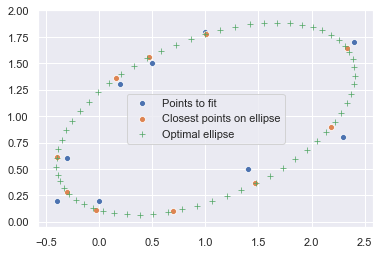

In [296]:
X = [[0.5, 1.5],
    [-0.3, 0.6],
    [1.0, 1.8],
    [-0.4, 0.2],
    [0.2, 1.3],
    [0.7, 0.1],
    [2.3, 0.8],
    [1.4, 0.5],
    [0.0, 0.2],
    [2.4, 1.7]]

acc = 0.001
lmbd = 50

theta = (X_arr[:,0].mean(), X_arr[:,1].mean(), 1, 0, 0)

X_arr = np.array(X)
# T_min = find_t(X_arr, theta)
# TX_arr = np.hstack((T_min, X_arr))

# J = Jacobi_matrix(TX_arr, theta)
# r = calc_residuals(TX_arr, theta)

# elp = ellipse(T_min, theta)
# print(elp)

y = np.arange(0, 2*math.pi, 0.1)
y.resize(y.shape[0], 1)
# line = ellipse(y, theta)

# sns.scatterplot(x=X_arr[:,0], y=X_arr[:,1])
# sns.scatterplot(x=elp[:,0], y=elp[:,1])
# sns.scatterplot(x=line[:,0], y=line[:,1], marker='+')

x_old = np.array(theta).reshape(len(x_old), 1)
# J = Jacobi_matrix(TX_arr, x_old)
# print(x_old[0].item(), x_old[1], x_old[4])
iter_count = 0
while True:
    iter_count+=1
    T_min = find_t(X_arr, x_old)
    TX_arr = np.hstack((T_min, X_arr))
    J = Jacobi_matrix(TX_arr, x_old)
    r = calc_residuals(TX_arr, x_old)
    p = np.dot(np.linalg.inv(np.dot(J.T, J) + lmbd*np.diag(np.dot(J.T,J).diagonal())), np.dot(J.T, r))
    x_new = x_old - p

    if np.linalg.norm(x_new-x_old) < acc:
        print(iter_count)
        print(x_new)
        elp = ellipse(T_min, x_old)
        line = ellipse(y, x_old)
        
        plt.figure(figsize=(20,10))
        sns.scatterplot(x=X_arr[:,0], y=X_arr[:,1], label='Points to fit')
        sns.scatterplot(x=elp[:,0], y=elp[:,1], label='Closest points on ellipse')
        sns.scatterplot(x=line[:,0], y=line[:,1], marker='+', label='Optimal ellipse')
        plt.show()
        break
    
    x_old = x_new